In [15]:
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

start = "2021-09-01"
end = "2022-09-30"

#CARTEIRA RECOMENDADA SETEMBRO 2021 - BB ASSET
# https://www.youtube.com/watch?v=869EIn4ZHxg
# Para o mês de setembro/2021 a BB asset optou por uma carteira mais defensiva, prevendo uma alta de volatilidade para o período

assets = ["BPAC11.SA", "CSMG3.SA", "PGMN3.SA", "ITUB4.SA", "JBSS3.SA", "MGLU3.SA", "PETR4.SA", "RDOR3.SA", "VALE3.SA", "EMBR3.SA"]
data = yf.download(assets, start = start, end = end)

[*********************100%***********************]  10 of 10 completed


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2021-09-01 to 2022-09-29
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, BPAC11.SA)  270 non-null    float64
 1   (Adj Close, CSMG3.SA)   270 non-null    float64
 2   (Adj Close, EMBR3.SA)   270 non-null    float64
 3   (Adj Close, ITUB4.SA)   270 non-null    float64
 4   (Adj Close, JBSS3.SA)   270 non-null    float64
 5   (Adj Close, MGLU3.SA)   270 non-null    float64
 6   (Adj Close, PETR4.SA)   270 non-null    float64
 7   (Adj Close, PGMN3.SA)   270 non-null    float64
 8   (Adj Close, RDOR3.SA)   270 non-null    float64
 9   (Adj Close, VALE3.SA)   270 non-null    float64
 10  (Close, BPAC11.SA)      270 non-null    float64
 11  (Close, CSMG3.SA)       270 non-null    float64
 12  (Close, EMBR3.SA)       270 non-null    float64
 13  (Close, ITUB4.SA)       270 non-null    float64
 14  (Close, JBSS3.SA)      

### Cálculo dos Retornos do fechamento ajustado "Adj Close"

#### O fechamento ajustado incorpora no preço do ativo, dentre outros itens,  as distribuições de dividendos

In [17]:
returns = pd.DataFrame.pct_change(data["Adj Close"]).dropna()

In [18]:
returns

,BPAC11.SA,CSMG3.SA,EMBR3.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,PETR4.SA,PGMN3.SA,RDOR3.SA,VALE3.SA
Date,,,,,,,,,,
2021-09-02,-0.012156,-0.009770,-0.006542,-0.036059,-0.030157,-0.035867,-0.016272,-0.015385,0.014412,-0.003136
2021-09-03,-0.005429,-0.016913,-0.044776,-0.005678,0.028779,0.049417,-0.010150,0.087993,-0.006959,0.000710
2021-09-06,0.016740,0.017921,-0.009651,0.012765,0.032154,0.030688,0.004937,0.004535,0.041168,-0.015719
2021-09-08,-0.048676,-0.031690,-0.022274,-0.047430,-0.025857,-0.035421,-0.056312,-0.026336,-0.018508,-0.020812
2021-09-09,0.038375,0.014546,0.026578,0.013231,0.033898,0.003193,0.021226,0.035549,0.011571,-0.003577
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,-0.017034,-0.010086,-0.074561,-0.019744,-0.020134,0.006522,-0.062617,0.102804,-0.017118,-0.020708
2022-09-26,-0.057897,-0.032023,-0.015008,-0.021555,-0.021690,-0.032397,-0.021710,-0.037288,-0.039187,0.002188
2022-09-27,0.020903,-0.033083,0.009623,-0.005778,0.008168,-0.066964,0.012974,-0.036972,-0.056495,-0.014843


#### Plotagem do histograma dos retornos dos ativos

array([[<AxesSubplot:title={'center':'BPAC11.SA'}>,
        <AxesSubplot:title={'center':'CSMG3.SA'}>,
        <AxesSubplot:title={'center':'EMBR3.SA'}>],
       [<AxesSubplot:title={'center':'ITUB4.SA'}>,
        <AxesSubplot:title={'center':'JBSS3.SA'}>,
        <AxesSubplot:title={'center':'MGLU3.SA'}>],
       [<AxesSubplot:title={'center':'PETR4.SA'}>,
        <AxesSubplot:title={'center':'PGMN3.SA'}>,
        <AxesSubplot:title={'center':'RDOR3.SA'}>],
       [<AxesSubplot:title={'center':'VALE3.SA'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

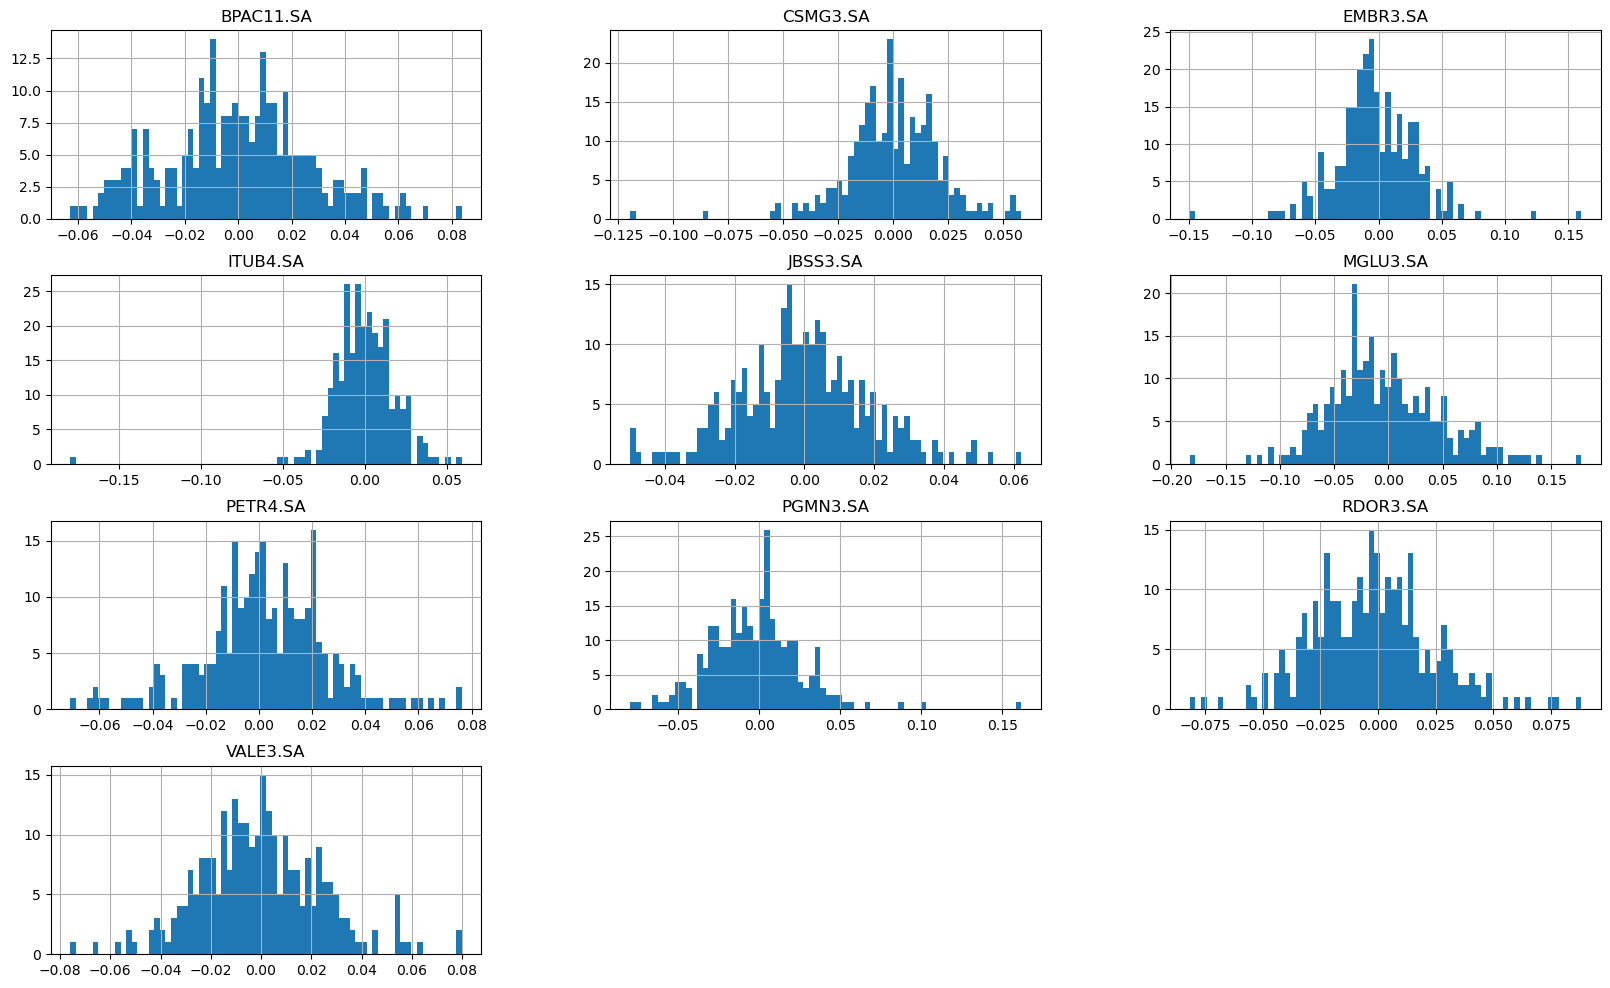

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
 
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(12)
returns.hist(bins=70, ax=ax)

###### Modelagem dos parâmetros do método HRP

In [20]:
codependence = 'pearson'
linkage = 'single'
t_factor = 252
leaf_order = True
hist = True
max_k = 10

method_mu = returns.mean()
method_cov = returns.cov() # Cálculo da matriz de covariância
model = 'HRP' # Definição do método Hierarquical Risk Parity
rm = 'MV' # Medição do Risco através da variância
obj = 'Sharpe' # A métrica de Risco utilizada para a otimização da carteira foi o sharpe ratio,
               # Mas também pode-se utilizar outras métricas como 'MinRisk' (menor risco, independente do retorno) ou 'MaxRet'
               # (Maior retorno, independente do risco)
rf = 0 # Taxa livre de risco, pode ser inserido aqui o CDI médio do período do backtest
l = 0
alpha = 0.05


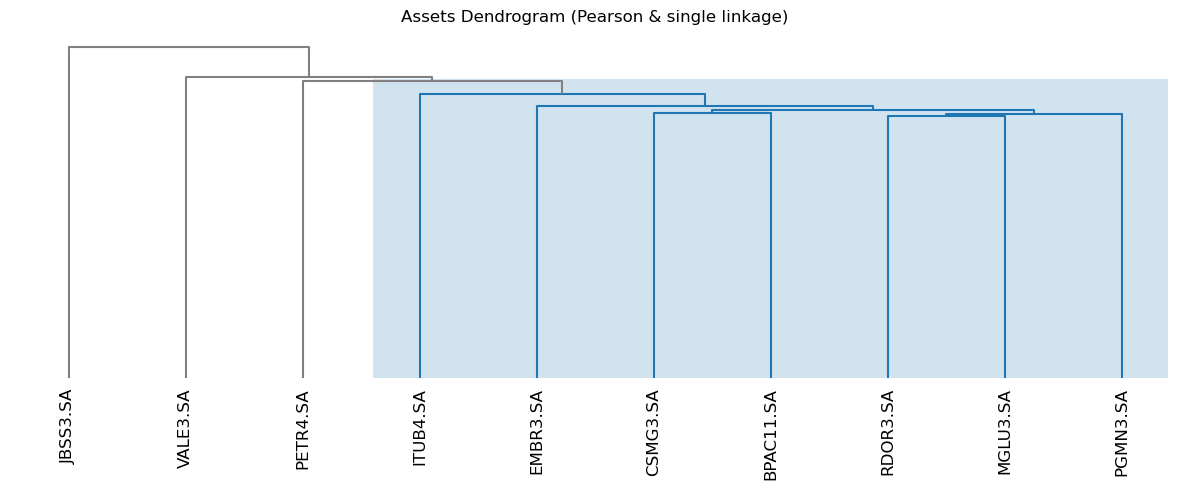

In [21]:
dendograma = rp.plot_dendrogram(returns=returns, codependence=codependence, linkage=linkage, 
                                k= None , max_k=max_k, leaf_order= leaf_order, ax= None )

######      Nota-se, através do dendrograma plotado acima, que a principal vantagem do método HRP não foi explorada, visto que devido
###### a escolha dos ativos ter sido baseada em questões fundamentalistas, tivemos a classificação de apenas um ramo (caminho 
###### hierárquico de risco), diminuindo a diversificação dos ativos sobre a ótica desse método.

###### Apesar do exposto acima, a carteira será mantida no intuito de podermos comparar com a proposta 2

In [22]:
port = rp.HCPortfolio(returns = returns) 
port.uppermdd = 0.4
port.lowerret = 0.4/365


OTIMIZAÇÃO

In [23]:
# port.assets_stats(method_mu = method_mu, method_cov = method_cov)
w = port.optimization(model = model, codependence=codependence, rm = rm, linkage=linkage, obj = obj,
                        rf = rf, l = l, hist = hist, max_k=max_k, leaf_order=leaf_order)

In [24]:
w

,weights
BPAC11.SA,0.069969
CSMG3.SA,0.111696
EMBR3.SA,0.054438
ITUB4.SA,0.138033
JBSS3.SA,0.233064
MGLU3.SA,0.013535
PETR4.SA,0.120662
PGMN3.SA,0.043713
RDOR3.SA,0.072353
VALE3.SA,0.142539


###### Matriz de métricas de risco (Para detalhamento de cada métrica, vide documentação da biblioteca riskfolio)

In [25]:
rms = ['vol', 'MV', 'MDD', 'MAD', 'MSV', 'FLPM', 'SLPM','VaR','CVaR', 'EVaR', 'WR', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          correlation=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MDD,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
BPAC11.SA,9.70%,7.00%,9.06%,9.42%,9.84%,9.42%,9.91%,9.17%,10.72%,13.17%,15.35%,6.89%,8.70%,8.61%,8.73%,7.84%,8.04%,5.40%,7.28%,7.31%,7.55%,6.40%
CSMG3.SA,12.26%,11.17%,12.67%,12.78%,11.67%,12.87%,11.80%,12.32%,10.64%,8.78%,8.08%,8.94%,10.74%,11.28%,11.80%,10.07%,11.17%,7.58%,9.32%,9.70%,10.26%,8.68%
EMBR3.SA,6.07%,5.44%,5.50%,6.17%,6.26%,5.74%,6.07%,5.27%,5.31%,5.98%,5.40%,3.42%,4.80%,5.09%,5.28%,3.98%,6.18%,3.94%,5.49%,5.82%,5.98%,4.52%
ITUB4.SA,9.67%,13.80%,12.33%,10.48%,8.79%,10.57%,8.91%,11.74%,8.58%,5.28%,4.49%,7.84%,11.18%,11.56%,11.94%,9.61%,11.39%,7.14%,10.56%,10.93%,11.17%,8.80%
JBSS3.SA,17.83%,23.31%,11.75%,17.39%,17.97%,17.44%,18.09%,17.83%,18.98%,19.55%,20.81%,17.23%,13.27%,12.65%,12.17%,15.19%,12.58%,18.81%,14.25%,13.48%,12.99%,16.57%
MGLU3.SA,2.87%,1.35%,0.71%,2.62%,3.02%,2.26%,2.73%,2.89%,3.23%,3.21%,3.09%,0.35%,0.56%,0.61%,0.65%,0.45%,1.25%,0.48%,0.93%,1.03%,1.11%,0.63%
PETR4.SA,12.91%,12.07%,32.06%,13.25%,12.74%,15.70%,14.07%,12.99%,11.81%,12.74%,12.05%,44.12%,36.60%,35.27%,34.17%,40.73%,32.06%,44.51%,36.50%,35.49%,34.35%,41.27%
PGMN3.SA,5.15%,4.37%,1.22%,4.94%,5.44%,4.26%,4.93%,4.57%,5.67%,6.60%,7.10%,0.69%,0.96%,1.04%,1.11%,0.84%,1.59%,0.76%,1.19%,1.31%,1.42%,0.96%
RDOR3.SA,9.60%,7.24%,2.98%,9.37%,9.93%,8.11%,9.07%,8.82%,9.94%,10.26%,9.93%,1.61%,2.41%,2.60%,2.75%,1.98%,3.61%,1.71%,2.79%,3.03%,3.25%,2.13%
VALE3.SA,13.95%,14.25%,11.73%,13.60%,14.34%,13.63%,14.42%,14.41%,15.13%,14.43%,13.69%,8.92%,10.78%,11.29%,11.42%,9.32%,12.12%,9.67%,11.69%,11.90%,11.92%,10.05%


####    De acordo com o período em análise, é possível observar na matriz de correelações de risco, que os ativos ALUP11, AESB3 e PETR4
#### apresentaram valores de risco acima da média dos demais ativos  

Plotagem

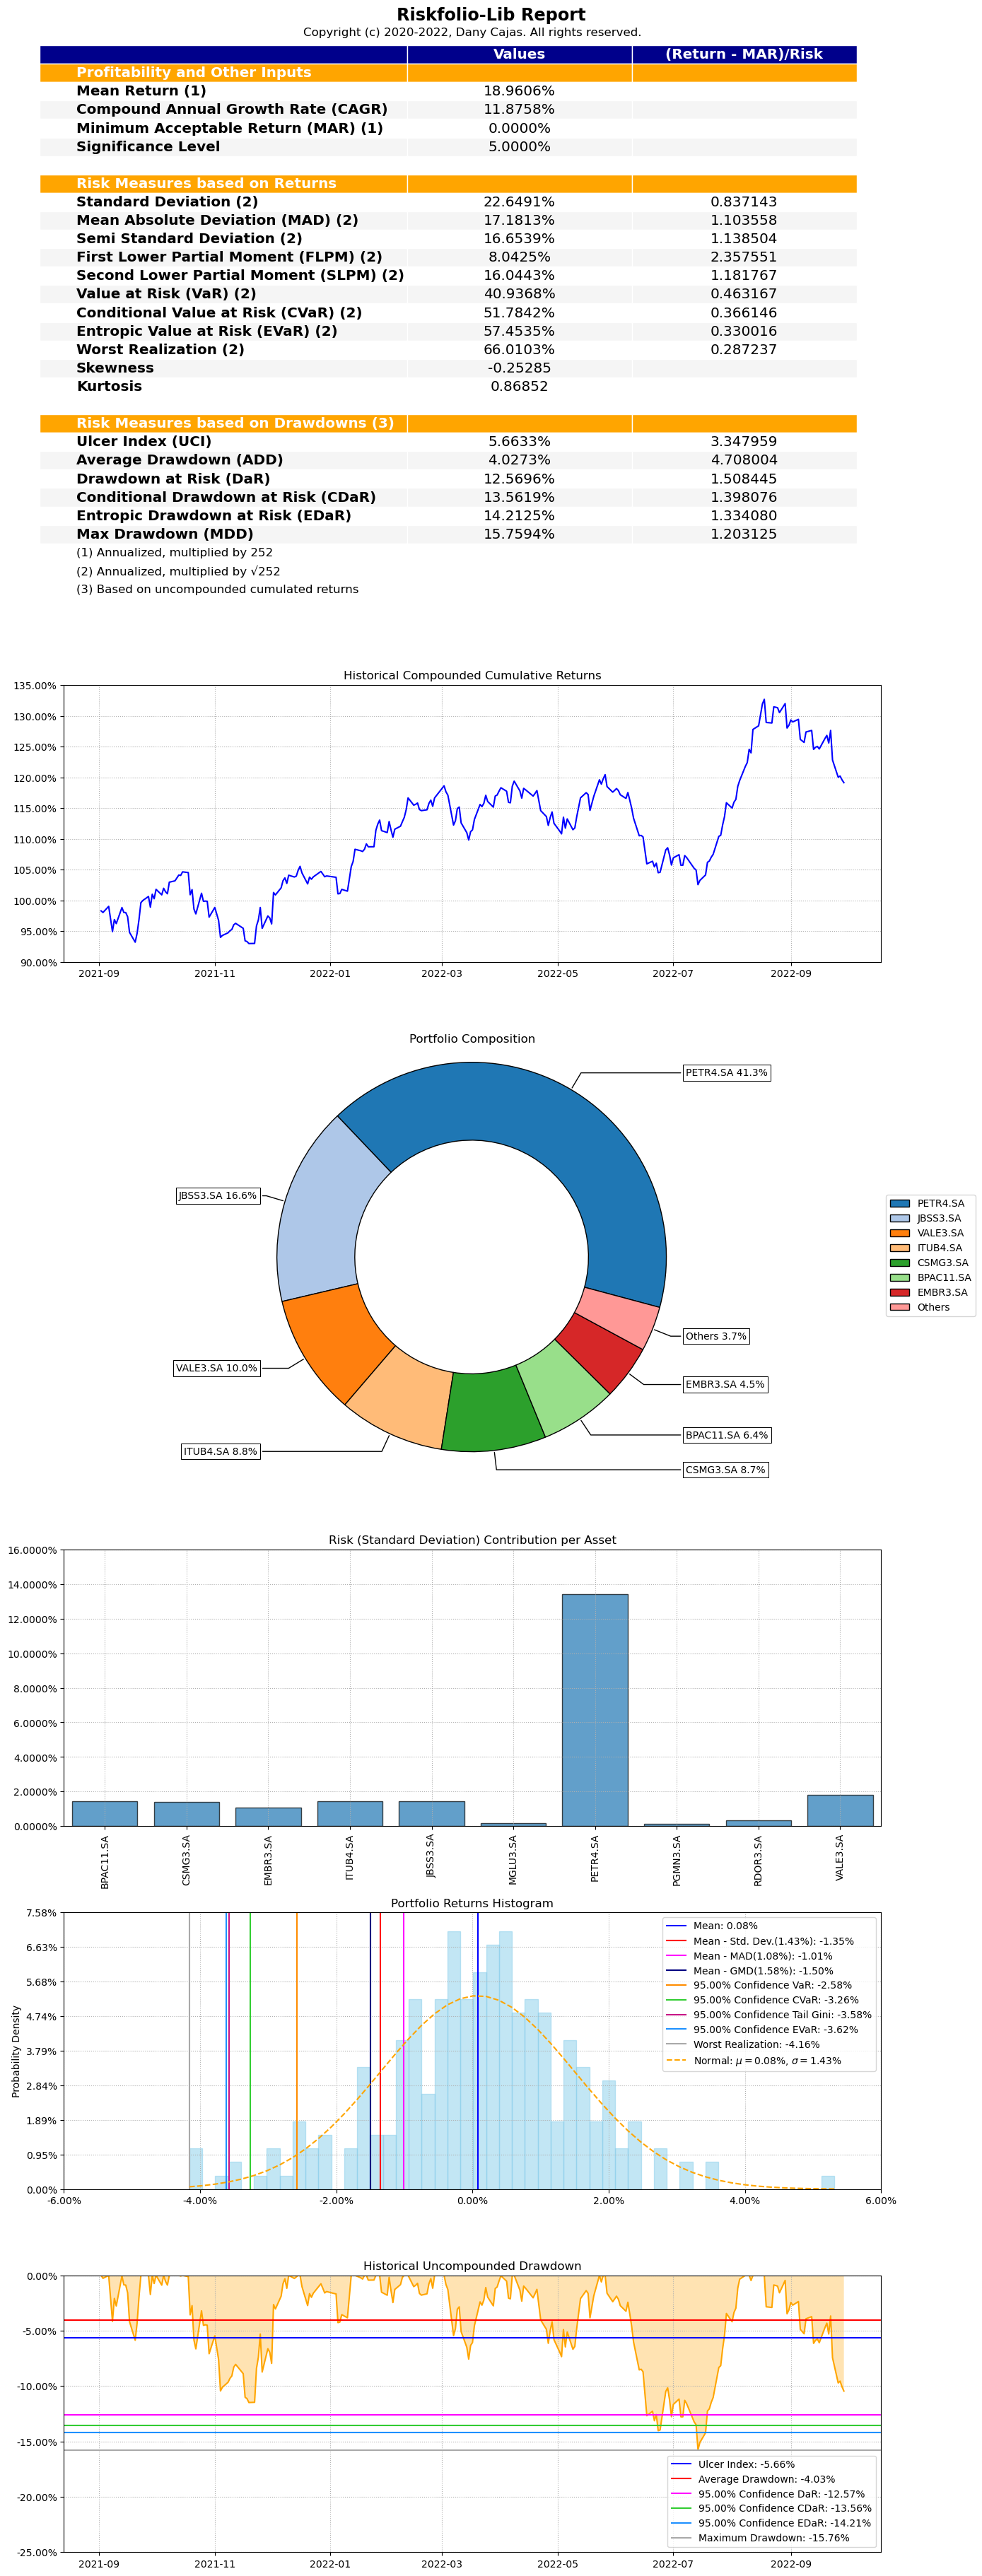

In [26]:
ax = rp.jupyter_report(returns, w, rm = rm)
plt.show()

In [27]:
# Plotagem do peso dos ativos no portfólio, de acordo com cada métrica de risco

<AxesSubplot:>

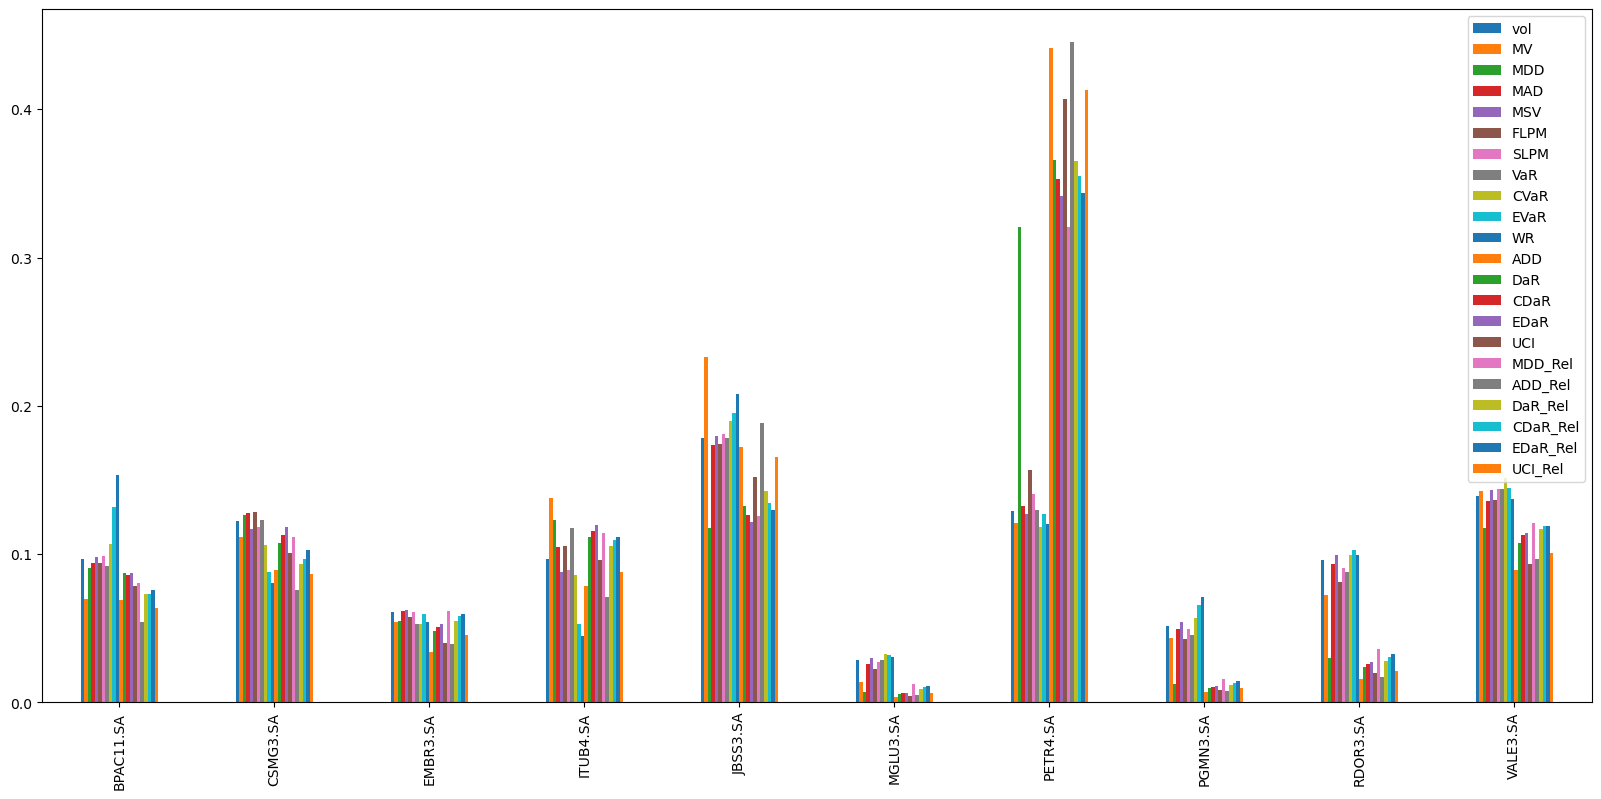

In [28]:
fig = plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(9)
ax = fig.subplots(nrows=1, ncols=1)
w_s.plot.bar(ax=ax)

Referências: A proposta 1, que explora os conceitos do método HRP de otimização de portfólios, utilizou a biblioteca python RiskFolio-lib:(https://github.com/dcajasn/Riskfolio-Lib), sendo que o código aqui apresentado utilizou como base os exemplos disponibilizados na documentação da referida biblioteca